In [1]:
import pandas as pd
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
alco_all = pd.read_csv('alco_all.csv', sep=';')
alco = pd.read_csv('alco.csv', sep = ';')
alco_all.rename(columns={alco_all.columns[0]: "Year"}, inplace=True)


In [3]:
print(alco_all.head())
print(alco.head())

   Year  Estonia  Latvia  Lithuania (recorded)  Poland  \
0  2000      NaN    8.94                   9.7    9.96   
1  2001      NaN    8.54                  10.5    9.36   
2  2002      NaN    9.16                  11.1    9.60   
3  2003      NaN    9.79                  11.3   10.50   
4  2004      NaN   10.22                  12.2   10.60   

   Lithuania (estimated total)  
0                        10.63  
1                        11.61  
2                        12.03  
3                        12.37  
4                        13.06  
   Country  Year    APC  Recorded  Unrecorded  Tourist  Beer  Wine  Spirits  \
0  Estonia  2000   9.37      9.03        1.73    -1.39  4.19  1.05     3.22   
1  Estonia  2001  10.19     10.10        1.61    -1.52  4.62  0.98     3.92   
2  Estonia  2002  11.77     12.16        1.37    -1.75  4.99  0.80     5.05   
3  Estonia  2003  11.35     11.64        1.41    -1.69  4.75  0.82     4.81   
4  Estonia  2004  14.36     15.52        0.98    -2.14  6.

COLUMNS DESCRIPTION:
- Country - country of measure
- Year - year of measure
- APC - alcohol per capita
- Recorded - recorded measure
- Unrecorded - unrecorded measure
- Turist - share of tourists in consumption
- Beer - share of beer consuption
- Wine - share of wine consumption
- Spirits - share of spirits consumption
- Other - share of other alcoholic beverages consumption

In [4]:
alco_all_melted = alco_all.melt(id_vars=["Year"], var_name="Country", value_name="Value")

In [5]:
result = alco_all_melted[
    (alco_all_melted['Country'].isin(alco['Country'])) &
    (alco_all_melted['Year'].isin(alco['Year']))
]

In [6]:
print(alco_all_melted.head(40))

    Year  Country  Value
0   2000  Estonia    NaN
1   2001  Estonia    NaN
2   2002  Estonia    NaN
3   2003  Estonia    NaN
4   2004  Estonia    NaN
5   2005  Estonia   9.80
6   2006  Estonia  10.40
7   2007  Estonia  12.20
8   2008  Estonia  11.90
9   2009  Estonia   9.90
10  2010  Estonia   9.80
11  2011  Estonia  10.10
12  2012  Estonia  10.30
13  2013  Estonia  10.40
14  2014  Estonia  10.60
15  2015  Estonia  10.80
16  2016  Estonia  11.20
17  2017  Estonia  12.60
18  2018  Estonia  13.20
19  2019  Estonia  12.90
20  2020  Estonia  12.60
21  2000   Latvia   8.94
22  2001   Latvia   8.54
23  2002   Latvia   9.16
24  2003   Latvia   9.79
25  2004   Latvia  10.22
26  2005   Latvia  11.05
27  2006   Latvia  11.39
28  2007   Latvia  12.68
29  2008   Latvia  12.44
30  2009   Latvia  10.94
31  2010   Latvia  10.91
32  2011   Latvia  11.10
33  2012   Latvia  11.13
34  2013   Latvia  11.28
35  2014   Latvia  11.39
36  2015   Latvia  11.53
37  2016   Latvia  11.89
38  2017   Latvia  12.88


In [7]:
print(result.head(40))

    Year  Country  Value
0   2000  Estonia    NaN
1   2001  Estonia    NaN
2   2002  Estonia    NaN
3   2003  Estonia    NaN
4   2004  Estonia    NaN
5   2005  Estonia   9.80
6   2006  Estonia  10.40
7   2007  Estonia  12.20
8   2008  Estonia  11.90
9   2009  Estonia   9.90
10  2010  Estonia   9.80
11  2011  Estonia  10.10
12  2012  Estonia  10.30
13  2013  Estonia  10.40
14  2014  Estonia  10.60
15  2015  Estonia  10.80
16  2016  Estonia  11.20
17  2017  Estonia  12.60
18  2018  Estonia  13.20
19  2019  Estonia  12.90
20  2020  Estonia  12.60
21  2000   Latvia   8.94
22  2001   Latvia   8.54
23  2002   Latvia   9.16
24  2003   Latvia   9.79
25  2004   Latvia  10.22
26  2005   Latvia  11.05
27  2006   Latvia  11.39
28  2007   Latvia  12.68
29  2008   Latvia  12.44
30  2009   Latvia  10.94
31  2010   Latvia  10.91
32  2011   Latvia  11.10
33  2012   Latvia  11.13
34  2013   Latvia  11.28
35  2014   Latvia  11.39
36  2015   Latvia  11.53
37  2016   Latvia  11.89
38  2017   Latvia  12.88


In [8]:
merged_result = result.merge(
    alco,
    how='left',
    left_on=['Year', 'Country'],
    right_on=['Year', 'Country']
)

merged_result['Difference'] = merged_result['Value'] - merged_result['Recorded']

print(merged_result)

    Year  Country  Value    APC  Recorded  Unrecorded  Tourist  Beer  Wine  \
0   2000  Estonia    NaN   9.37      9.03        1.73    -1.39  4.19  1.05   
1   2001  Estonia    NaN  10.19     10.10        1.61    -1.52  4.62  0.98   
2   2002  Estonia    NaN  11.77     12.16        1.37    -1.75  4.99  0.80   
3   2003  Estonia    NaN  11.35     11.64        1.41    -1.69  4.75  0.82   
4   2004  Estonia    NaN  14.36     15.52        0.98    -2.14  6.04  1.47   
..   ...      ...    ...    ...       ...         ...      ...   ...   ...   
58  2016   Poland  11.42  11.42     10.42        1.49    -0.49  5.84  0.83   
59  2017   Poland  11.50  11.50     10.54        1.45    -0.49  5.79  0.87   
60  2018   Poland  11.57  11.57     10.65        1.41    -0.49  5.92  0.85   
61  2019   Poland  11.82  11.82     10.96        1.36    -0.51  5.72  0.88   
62  2020   Poland  11.66  11.66     10.79        1.37    -0.50  5.52  0.91   

    Spirits  Other  Difference  
0      3.22   0.57         NaN

In [9]:
alcohol_consumption_overall = alco_all
del alco_all
alcohol_consumption_by_beverage = alco
del alco

In [10]:
## Final Model (included in the article)
import pandas as pd
import statsmodels.api as sm

# Loading model_data
data = pd.read_excel('model_data.xlsx')

print(data.head())

# Creating dependent and independent variables for OLS
y = data['APC_c']

X = data[['Year_c', 'Estonia', 'Latvia', 'Lithuania', 
          'Stricter alcohol policy', 'Looser alcohol policy']]

X = sm.add_constant(X)

#Building the model and checking the results

model = sm.OLS(y, X).fit()

print(model.summary())


     APC  APC_c  Year_c  Estonia  Latvia  Lithuania  Stricter alcohol policy  \
0  10.19   0.82    -9.5        1       0          0                        0   
1  11.77   1.58    -8.5        1       0          0                        0   
2  11.35  -0.42    -7.5        1       0          0                        0   
3  14.36   3.01    -6.5        1       0          0                        0   
4  15.18   0.82    -5.5        1       0          0                        0   

   Looser alcohol policy  Stricter marketing policy  
0                      0                          0  
1                      0                          0  
2                      0                          0  
3                      0                          0  
4                      0                          0  
                            OLS Regression Results                            
Dep. Variable:                  APC_c   R-squared:                       0.264
Model:                            OLS

### Model testing

Authors only included a note under Table 1 indicating that the Durbin-Watson test statistic and p-value, indicating no significant autocorrelation in the data.

The authors obtained below results:

$`\text{test statistic} = 2.17`$

$`\text{p-value} = 0.62`$

In [11]:
# Durbin-Watson test

dw_stat = sms.durbin_watson(model.resid)
round(float(dw_stat),2)


2.17

It is important to note that the Python implementation of Durbin-Watson test does not provide a p-value in its results, thus we cannot verify the authors claim. However, the **value of the test statistic we obtained is equal to test statistic obtained by the authors**. 

Authors did not provide information about performing other tests to check the validity of the OLS model. Thus we do not know how the model was (or not) tested further, and we only know that the autocorrelation assumption is met, based on Durbin-Watson (D-W) test. 

To ensure that the results are valid we will verify the, omitted in the paper, other critical OLS model assumptions:
- Linear relation of parameters 
- No perfect multicolineatity present
- Homoscedasticity
- Normal distribution of errors

##### Linear relation of parameters

RESET Test - test to verify correct, liear form

$`H_0 = \text{Correct functional (linear) form}`$

In [12]:
sms.linear_reset(model)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.8907507681996072, p-value=0.6405837659329858, df_denom=2>

p-value of ~0.64 indicates that we failed to reject $`H_0`$, thus model has correct functional form

##### No multicolinearity

VIF - Variance Inflation Factor - measures increase in variance of a regression coefficient caused by multicolinearity

We will asume that the VIF of above 10 indicates significant multicolinearity


In [13]:
vif_table = pd.DataFrame()
vif_table["feature"] = X.columns

vif_table["VIF_value"] = [VIF(X.values, idx) for idx in range(len(X.columns))]
vif_table

,feature,VIF_value
0,const,4.188317
1,Year_c,1.034564
2,Estonia,1.529377
3,Latvia,1.530499
4,Lithuania,1.530499
5,Stricter alcohol policy,1.060849
6,Looser alcohol policy,1.032076


We can see that no VIF value is above 10, thus the no multicolinearity assumption is met

##### Homoscedasticity

Breusch-Pagan test 

$`H_0 = \text{there is homoskedasticity}`$

In [14]:
_, _, stat, pv = sms.het_breuschpagan(model.resid, model.model.exog)
stat, pv

(1.0548203078514962, 0.3975891176852639)

P-value of ~0.39 indicates that we failed to reject $`H_0`$, and thus the Homoscedasticity assumption is met

##### Normal distribution of errors

Jarque-Bera Test

$`H_0 = \text{Data is normally distributed}`$

In [15]:
stat, pv, _, _ = sms.jarque_bera(model.resid)
stat, pv

(30.027682049726774, 3.0169748561794065e-07)

P-value of less than 0.01 indicates that we reject the null hypothesis, and thus this assumption of the OLS model is not met. Considering the sample size (n=80), it can be considered as sample big enough to apply Central Limit Theorem (CTL), thus we can assume normality of error distribution

In [16]:
## Model A3.1

# Define dependent variable
y = data['APC_c']

# Create interaction term: Estonia * Stricter alcohol policy
data['Estonia_Stricter_policy'] = data['Estonia'] * data['Stricter alcohol policy']

# Define independent variables including interaction term
X = data[['Year_c', 'Estonia', 'Latvia', 'Lithuania', 
          'Stricter alcohol policy', 'Estonia_Stricter_policy']]

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit OLS regression model
model_interaction = sm.OLS(y, X).fit()

# Display model summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                  APC_c   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.995
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000246
Time:                        23:32:35   Log-Likelihood:                -82.261
No. Observations:                  80   AIC:                             178.5
Df Residuals:                      73   BIC:                             195.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Model A3.1 testing

Again, authors only included a note under indicating that the Durbin-Watson test statistic and p-value, indicating no significant autocorrelation in the data.

The authors for model A3.1 obtained below results:

$`\text{test statistic} = 2.36`$

$`\text{p-value} = 0.87`$

In [17]:
# Durbin-Watson test

dw_stat_31 = sms.durbin_watson(model_interaction.resid)
round(float(dw_stat_31),2)

2.36

D-W Test statistic is **equal to the one found by authors for model A3.1**

##### Linear relation of parameters (Model A3.1)

In [18]:
sms.linear_reset(model_interaction)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=3.1050926234130896, p-value=0.21170821181909508, df_denom=2>

p-value of ~0.21 indicates that we failed to reject $`H_0`$ -> model A3.1 has correct functional form

##### No multicolinearity (Model A3.1)

In [19]:
vif_table = pd.DataFrame()
vif_table["feature"] = X.columns

vif_table["VIF_value"] = [VIF(X.values, idx) for idx in range(len(X.columns))]
vif_table

,feature,VIF_value
0,const,4.098753
1,Year_c,1.040615
2,Estonia,1.773098
3,Latvia,1.518516
4,Lithuania,1.518516
5,Stricter alcohol policy,1.504433
6,Estonia_Stricter_policy,1.832643


No VIF value above 10 - no multicolinearity assumption is met

##### Homoscedasticity (Model A3.1)

In [20]:
_, _, stat31, pv31 = sms.het_breuschpagan(model_interaction.resid, model_interaction.model.exog)
stat31, pv31

(1.157043325310334, 0.33873808241470205)

p-value of ~0.34 - we failed to reject $`H_0`$ - the Homoscedasticity assumption is met

##### Normal distribution of errors (Model A3.1)

In [21]:
stat31, pv31, _, _ = sms.jarque_bera(model_interaction.resid)
stat31, pv31

(33.99528689176934, 4.149705210344608e-08)

P-value again indicates that we reject the null hypothesis, however with the same sample size as for main model, we can assume that CLT applies, thus this assumption is met

In [22]:
## Model A3.2

# Define dependent variable
y = data['APC_c']

# Create interaction term: Latvia * Stricter alcohol policy
data['Latvia_Stricter_policy'] = data['Latvia'] * data['Stricter alcohol policy']

# Define independent variables including interaction term
X = data[['Year_c', 'Estonia', 'Latvia', 'Lithuania', 
          'Stricter alcohol policy','Latvia_Stricter_policy']]

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit OLS regression model
model_interaction = sm.OLS(y, X).fit()

# Display model summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                  APC_c   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     4.394
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000763
Time:                        23:32:39   Log-Likelihood:                -83.687
No. Observations:                  80   AIC:                             181.4
Df Residuals:                      73   BIC:                             198.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Model A3.2 testing

Results for D-W test obtained by the authors for model A3.2:

$`\text{test statistic} = 2.19`$

$`\text{p-value} = 0.65`$

In [23]:
# Durbin-Watson test

dw_stat_32 = sms.durbin_watson(model_interaction.resid)
round(float(dw_stat_32),2)

2.19

We obtained the same test statistic - assumption is met

##### Linear relation of parameters (Model A3.2)

In [24]:
sms.linear_reset(model_interaction)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.07298384242141026, p-value=0.9641658831578754, df_denom=2>

Assumption is met

##### No multicolinearity (Model A3.2)

In [25]:
vif_table = pd.DataFrame()
vif_table["feature"] = X.columns

vif_table["VIF_value"] = [VIF(X.values, idx) for idx in range(len(X.columns))]
vif_table

,feature,VIF_value
0,const,4.096359
1,Year_c,1.054417
2,Estonia,1.540651
3,Latvia,1.706246
4,Lithuania,1.518067
5,Stricter alcohol policy,1.467962
6,Latvia_Stricter_policy,1.653215


Assumption is met

##### Homoscedasticity (Model A3.2)

In [26]:
_, _, stat32, pv32 = sms.het_breuschpagan(model_interaction.resid, model_interaction.model.exog)
stat32, pv32

(1.1545441597928778, 0.3400932376093569)

Assumption is met

##### Normal distribution of errors (Model A3.2)

In [27]:
stat32, pv32, _, _ = sms.jarque_bera(model_interaction.resid)
stat32, pv32

(29.44107183902951, 4.045316254236794e-07)

Again, test suggest that the assumption is not met, however CLT applies, thus we assume that residuals have normal distribution

In [28]:
## Model A3.3

# Define dependent variable
y = data['APC_c']

# Create interaction term: Lithuania * Stricter alcohol policy
data['Lithuania_Stricter_policy'] = data['Lithuania'] * data['Stricter alcohol policy']

# Define independent variables including interaction term
X = data[['Year_c', 'Estonia', 'Latvia', 'Lithuania', 
          'Stricter alcohol policy', 'Lithuania_Stricter_policy']]

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit OLS regression model
model_interaction = sm.OLS(y, X).fit()

# Display model summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                  APC_c   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     4.349
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000830
Time:                        23:32:45   Log-Likelihood:                -83.795
No. Observations:                  80   AIC:                             181.6
Df Residuals:                      73   BIC:                             198.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model A3.3 testing

Results for D-W test obtained by the authors for model A3.3:

$`\text{test statistic} = 2.21`$

$`\text{p-value} = 0.67`$

In [29]:
# Durbin-Watson test

dw_stat_33 = sms.durbin_watson(model_interaction.resid)
round(float(dw_stat_33),2)

2.21

Same result obtained - assumption is met

##### Linear relation of parameters (Model A3.3)

In [30]:
sms.linear_reset(model_interaction)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=0.48959746063608267, p-value=0.7828620887898903, df_denom=2>

Assumption is met

##### No multicolinearity (Model A3.3)

In [31]:
vif_table = pd.DataFrame()
vif_table["feature"] = X.columns

vif_table["VIF_value"] = [VIF(X.values, idx) for idx in range(len(X.columns))]
vif_table

,feature,VIF_value
0,const,4.093486
1,Year_c,1.034660
2,Estonia,1.539439
3,Latvia,1.517529
4,Lithuania,1.705432
5,Stricter alcohol policy,1.424203
6,Lithuania_Stricter_policy,1.622239


Assumption is met

##### Homoscedasticity (Model A3.3)

In [32]:
_, _, stat33, pv33 = sms.het_breuschpagan(model_interaction.resid, model_interaction.model.exog)
stat33, pv33

(1.1406055202117749, 0.3477281271446233)

Assumption is met

##### Normal distribution of errors (Model A3.3)

In [33]:
stat33, pv33, _, _ = sms.jarque_bera(model_interaction.resid)
stat33, pv33

(29.579632274034225, 3.7745437480056876e-07)

CTL applies - assumption is met

In [34]:
## Model A3.4

# Define dependent variable
y = data['APC_c']

# Create interaction term: Year_c * Stricter alcohol policy
data['Year_c_Stricter_policy'] = data['Year_c'] * data['Stricter alcohol policy']

# Define independent variables including interaction term
X = data[['Year_c', 'Estonia', 'Latvia', 'Lithuania', 
          'Stricter alcohol policy', 'Year_c_Stricter_policy']]

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit OLS regression model
model_interaction = sm.OLS(y, X).fit()

# Display model summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                  APC_c   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.466
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000665
Time:                        23:32:51   Log-Likelihood:                -83.513
No. Observations:                  80   AIC:                             181.0
Df Residuals:                      73   BIC:                             197.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Model A3.4 testing

Results for D-W test obtained by the authors for model A3.4:

$`\text{test statistic} = 2.13`$

$`\text{p-value} = 0.56`$

In [35]:
# Durbin-Watson test

dw_stat_34 = sms.durbin_watson(model_interaction.resid)
round(float(dw_stat_34),2)

2.14

Same result obtained - assumption is met

##### Linear relation of parameters (Model A3.4)

In [36]:
sms.linear_reset(model_interaction)

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=3.8561284377002414, p-value=0.14542944575894903, df_denom=2>

Assumption is met

##### No multicolinearity (Model A3.4)

In [37]:
vif_table = pd.DataFrame()
vif_table["feature"] = X.columns

vif_table["VIF_value"] = [VIF(X.values, idx) for idx in range(len(X.columns))]
vif_table

,feature,VIF_value
0,const,4.081364
1,Year_c,1.235759
2,Estonia,1.530411
3,Latvia,1.533164
4,Lithuania,1.513226
5,Stricter alcohol policy,1.164098
6,Year_c_Stricter_policy,1.388056


Assumption is met

##### Homoscedasticity (Model A3.4)

In [38]:
_, _, stat34, pv34 = sms.het_breuschpagan(model_interaction.resid, model_interaction.model.exog)
stat34, pv34

(1.037211544808331, 0.40843280558378736)

Assumption is met

##### Normal distribution of errors (Model A3.4)

In [39]:
stat34, pv34, _, _ = sms.jarque_bera(model_interaction.resid)
stat34, pv34

(32.6275629240043, 8.222705424207525e-08)

CLT applies - assumption is met

In [40]:
## Model A4

# Define dependent variable
y = data['APC_c']

# Define independent variables
X = data[['Year_c', 'Estonia', 'Latvia', 'Lithuania', 
          'Stricter alcohol policy', 'Stricter marketing policy']]

# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit OLS regression model
model_interaction = sm.OLS(y, X).fit()

# Display model summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                  APC_c   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     4.321
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000877
Time:                        23:32:59   Log-Likelihood:                -83.863
No. Observations:                  80   AIC:                             181.7
Df Residuals:                      73   BIC:                             198.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model A4 testing

Results for D-W test obtained by the authors for model A4:

$`\text{test statistic} = 2.14`$

$`\text{p-value} = 0.55`$

In [41]:
# Durbin-Watson test

dw_stat_4 = sms.durbin_watson(model_interaction.resid)
round(float(dw_stat_4),2)

2.2

The value of obtained test statistic **is different than the one obtained by the authors**. However, for this value of critical value the assumption is still met

##### Linear relation of parameters (Model A4)

In [42]:
vif_table = pd.DataFrame()
vif_table["feature"] = X.columns

vif_table["VIF_value"] = [VIF(X.values, idx) for idx in range(len(X.columns))]
vif_table

,feature,VIF_value
0,const,4.081034
1,Year_c,1.036601
2,Estonia,1.545387
3,Latvia,1.515671
4,Lithuania,1.535689
5,Stricter alcohol policy,1.234499
6,Stricter marketing policy,1.221352


Assumption is met

##### Homoscedasticity (Model A4)

In [43]:
_, _, stat4, pv4 = sms.het_breuschpagan(model_interaction.resid, model_interaction.model.exog)
stat4, pv4

(1.1133055885607006, 0.36305957597286503)

Assumption is met

##### Normal distribution of errors (Model A4)

In [44]:
stat4, pv4, _, _ = sms.jarque_bera(model_interaction.resid)
stat4, pv4

(28.90970252320182, 5.276401806453845e-07)

CLT applies - assumption is met

## Reproduction of visualization

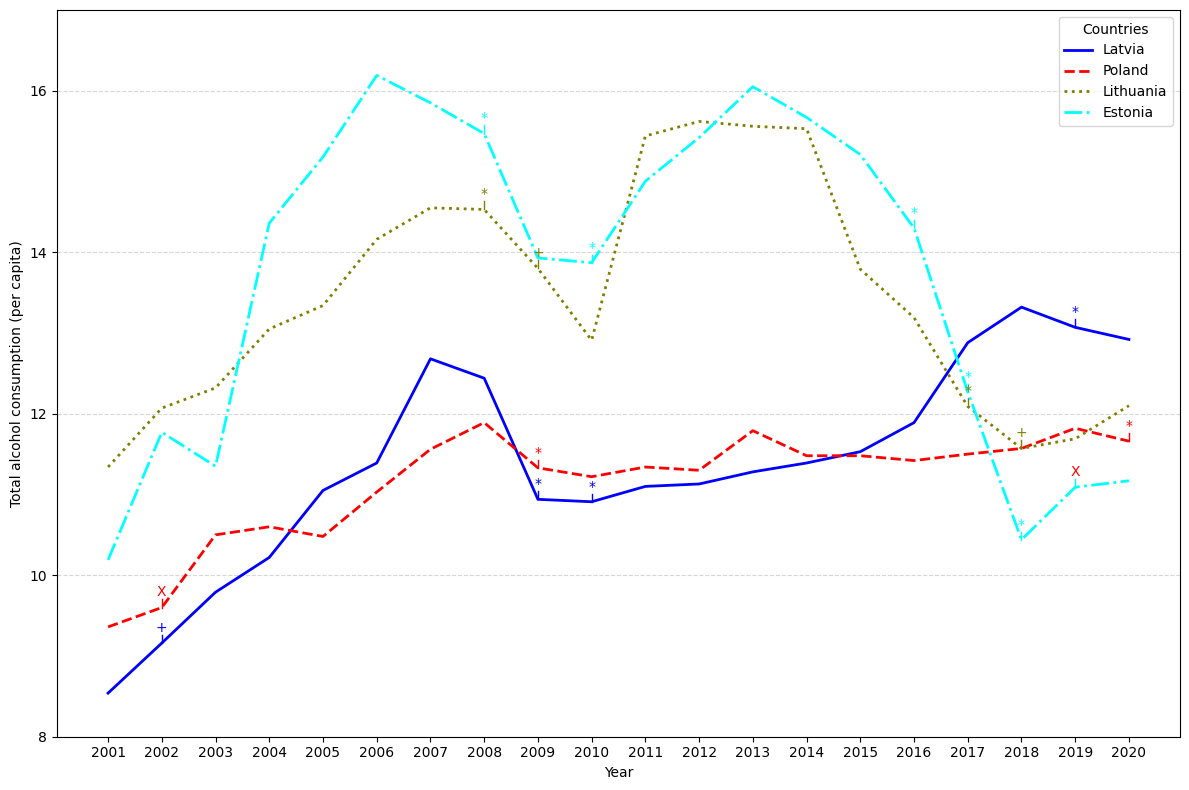

In [45]:
# alcohol consumption data preparation
alco_all = pd.read_csv("alco_all.csv", sep=";")
alco_all.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

alco_df = pd.read_csv("alco.csv", sep=";")
alco_apc_pivot = alco_df.pivot(index="Year", columns="Country", values="APC").reset_index()

df = pd.merge(alcohol_consumption_overall[["Year"]], alco_apc_pivot, on="Year", how="left")
df = df[df['Year'] > 2000]

policy_df = pd.read_excel(
    "Polityki sklasyfikowane jako Stricter alcohol policy oraz Looser alcohol policy..xlsx",
    sheet_name="Arkusz1"
)
country_map = {"Łotwa": "Latvia", "Polska": "Poland", "Litwa": "Lithuania", "Estonia": "Estonia"}
policy_df["Country"] = policy_df["Kraj"].map(country_map)

# policy classification to symbols
def classify_policy_final(description):
    desc = str(description).lower()
    if any(word in desc for word in ["obniżk"]):
        return "X"
    elif any(word in desc for word in ["podwyżk"]):
        return "*"
    elif any(word in desc for word in ["zakaz"]):
        return "+"

policy_df["Symbol"] = policy_df["Opis polityki"].apply(classify_policy_final)

# country linestyles
country_styles = {
    "Latvia": {"color": "blue", "linestyle": "-", "label": "Latvia"},
    "Poland": {"color": "red", "linestyle": "--", "label": "Poland"},
    "Lithuania": {"color": "olive", "linestyle": ":", "label": "Lithuania"},
    "Estonia": {"color": "cyan", "linestyle": "-.", "label": "Estonia"},
}

# reproduction of visualization
plt.figure(figsize=(12, 8))

for country, style in country_styles.items():
    plt.plot(df["Year"],
             df[country],
             label=style["label"],
             color=style["color"],
             linestyle=style["linestyle"],
             linewidth=2)

    country_policies = policy_df[policy_df["Country"] == country]

    for year in country_policies["Rok"].unique():
        symbols_in_year = set(country_policies[country_policies["Rok"] == year]["Symbol"])
        y_val = df.loc[df["Year"] == year, country]
        if y_val.empty or pd.isna(y_val.values[0]):
            continue
        y = y_val.values[0]

        if "X" in symbols_in_year:
            symbol = "X"
            symbol_color = "red"
        elif "*" in symbols_in_year:
            symbol = "*"
            symbol_color = style["color"]
        elif "+" in symbols_in_year:
            symbol = "+"
            symbol_color = style["color"]
        else:
            continue

        plt.plot([year, year], [y, y + 0.1], color=style["color"], linewidth=1)
        plt.text(year, y + 0.1, symbol, color=symbol_color,
                 fontsize=10, ha="center", va="bottom")

# formatting the visualization
plt.xlabel("Year")
plt.ylabel("Total alcohol consumption (per capita)")
plt.xticks(range(2001, 2021, 1))
plt.ylim(8, 17)
plt.yticks(range(8, 17, 2))
plt.legend(title="Countries")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
